# 基础理论部分


0. Can you come up out 3 sceneraies which use AI methods?

Ans: Face recognition; Chat Robot; Spam automatic detect and removal


1. How do we use Github; Why do we use Jupyter and Pycharm;

Ans: we can share code on Github, it helps control version and collaborate.
     Jupyter can show result instantly, good for class teaching
     Pycharm works well with larger project 


2. What's the Probability Model?

Ans: It is based on Bayesian's probability algorithm, the event are not independent, we can use past data to create a pattern and predict future result. The larger the datebase,the more accurate the pattern is.


3. Can you came up with some sceneraies at which we could use Probability Model?

Ans: predict tomorrow's weather; Predict aftershocks that occurred after a major earthquake


4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

Ans: it can be more effective and we don't need to get deep down on the very details of the actual event.
    the difficult lies in data clean and we need a very large datebase.


5. What's the Language Model;

Ans: use probability to predict the order or occurance of a sentence or phrase


6. Can you came up with some sceneraies at which we could use Language Model?

Ans: Speech Recognition; Translation


7. What's the 1-gram language model;

Ans: each word is independant, we compute the word itself's probility. It is simple probability of
a given word amongst all words.


8. What's the disadvantages and advantages of 1-gram language model;

Ans:  the result is not ideal
advantage: the math is relatively simple and don't need much computer resouce


9. What't the 2-gram models;

Ans: given two words, we can calculate the occurance of the orders, and by comparing the probility, we can decide which combination(order) is more likely occured in real life. 
 

# 编程实践部分

# 1. 设计你自己的句子生成器

In [116]:
import random

In [117]:
guest = """
guest = 自己 动作 蔬菜 制作 肉制品
自己 = 我 | 俺 | 我们
动作 =  要吃 | 想吃
蔬菜 =  白菜 | 番茄 | 粉条 | 土豆 | 茄子
制作 = 炒 | 烧 | 炖
肉制品  = 鸡蛋 | 牛肉 | 猪肉 | 小龙虾
"""

waiter = """
waiter = 寒暄 询问 吃什么 结尾
寒暄 = 人称 打招呼
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好
询问 = 请问你要 | 您需要
结尾 = 吗？
"""

In [118]:
def  create_Grammar(str,split1 = '=',str_split = '\n'):
    grammar = {}
    for line in str.split(str_split):
        if not line.strip(): continue
        exp, stmt = line.split(split1)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [119]:
gu =create_Grammar(guest)

In [120]:
wa = create_Grammar(waiter)

In [121]:
print(gu,wa)

{'guest': [['自己', '动作', '蔬菜', '制作', '肉制品']], '自己': [['我'], ['俺'], ['我们']], '动作': [['要吃'], ['想吃']], '蔬菜': [['白菜'], ['番茄'], ['粉条'], ['土豆'], ['茄子']], '制作': [['炒'], ['烧'], ['炖']], '肉制品': [['鸡蛋'], ['牛肉'], ['猪肉'], ['小龙虾']]} {'waiter': [['寒暄', '询问', '吃什么', '结尾']], '寒暄': [['人称', '打招呼']], '人称': [['先生'], ['女士'], ['小朋友']], '打招呼': [['你好'], ['您好']], '询问': [['请问你要'], ['您需要']], '结尾': [['吗？']]}


In [122]:
choice = random.choice

In [110]:
def generate(gram,target):
    if target not in gram : return target
    expaned =[ generate(gram,t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])  

In [111]:
print(generate(gu,'guest'))

我要吃粉条烧小龙虾


In [114]:
def generate_n(n):
    for i in range(1,n):
        print(generate(wa,'waiter'),generate(gu,'guest'))

In [271]:
generate_n(10)

先生你好您需要吃什么吗？ 我们想吃白菜炒小龙虾
女士你好请问你要吃什么吗？ 我要吃茄子炖猪肉
小朋友您好请问你要吃什么吗？ 我想吃茄子烧猪肉
先生你好请问你要吃什么吗？ 我们想吃白菜烧猪肉
女士您好您需要吃什么吗？ 俺要吃白菜炒猪肉
先生你好请问你要吃什么吗？ 我要吃土豆烧牛肉
小朋友您好请问你要吃什么吗？ 我要吃茄子炒牛肉
小朋友您好请问你要吃什么吗？ 我要吃土豆烧猪肉
女士您好请问你要吃什么吗？ 俺要吃番茄烧猪肉


In [275]:
def generate_n1():
    return [generate(gu,'guest') for i in range(10)]

In [276]:
generate_n1()

['俺想吃番茄炖小龙虾',
 '我想吃土豆炖小龙虾',
 '我们想吃茄子炒小龙虾',
 '我们要吃粉条炖鸡蛋',
 '我想吃茄子烧小龙虾',
 '我们想吃土豆炖牛肉',
 '我想吃茄子炖鸡蛋',
 '我们想吃土豆炖牛肉',
 '俺想吃白菜烧牛肉',
 '我们要吃白菜炖牛肉']

# 2. 使用新数据源完成语言模型的训练

In [150]:
import random

In [151]:
filename = 'movie_comments.csv'

In [152]:
import pandas as pd

In [153]:
content = pd.read_csv(filename)

In [154]:
content.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [171]:
articles = content['comment'].tolist()

In [172]:
len(articles)

261497

In [173]:
import re

In [174]:
def token(string):
    # regular expression
    return re.findall('\w+', string)

In [180]:
import jieba

In [181]:
from collections import Counter

In [194]:
with_jieba_cut = Counter(jieba.cut(articles[30]))

In [195]:
with_jieba_cut.most_common()[:10]

[('，', 8),
 ('的', 6),
 ('人', 3),
 ('电影', 2),
 ('就', 2),
 ('能', 2),
 ('敢', 2),
 ('去', 2),
 ('更', 2),
 ('用', 1)]

In [196]:
''.join(token(articles[30]))

'电影用的胶卷挺差的故事过度也差地方部队还没太多展示就死去反正各种问题但就是能吸引人看下去就冲这为什么要这么鄙视敢想敢去开拓的人不允许他们再去拍直到能有更好的人拍出更棒的更出彩的电影来呢'

In [197]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [198]:
len(articles_clean)

261497

In [205]:
with open('article_mvcom.txt', 'w',encoding = 'utf-8') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [206]:
def cut(string): return list(jieba.cut(string))

In [207]:
TOKEN = []

In [210]:
for i, line in enumerate((open('article_mvcom.txt', encoding= 'utf-8'))):
    if i % 100 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    if i > 100000: break    
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [203]:
from functools import reduce

In [204]:
from operator import add, mul

In [211]:
words_count = Counter(TOKEN)

In [212]:
words_count.most_common(100)

[('的', 127398),
 ('\n', 100001),
 ('了', 44537),
 ('是', 29955),
 ('我', 21014),
 ('都', 15430),
 ('看', 14093),
 ('电影', 13545),
 ('也', 13437),
 ('很', 13356),
 ('和', 12586),
 ('在', 12181),
 ('不', 11864),
 ('有', 11599),
 ('就', 11161),
 ('人', 9400),
 ('好', 9284),
 ('啊', 8984),
 ('还', 7740),
 ('你', 7569),
 ('这', 7332),
 ('还是', 6989),
 ('一个', 6931),
 ('但', 6479),
 ('就是', 6013),
 ('没有', 5980),
 ('剧情', 5616),
 ('让', 5534),
 ('故事', 5508),
 ('太', 5195),
 ('喜欢', 5170),
 ('没', 4752),
 ('说', 4716),
 ('吧', 4669),
 ('给', 4664),
 ('又', 4627),
 ('不错', 4510),
 ('到', 4421),
 ('他', 4346),
 ('得', 4311),
 ('一部', 4225),
 ('上', 4214),
 ('这个', 4186),
 ('能', 4141),
 ('被', 4087),
 ('最后', 4081),
 ('什么', 4020),
 ('多', 4007),
 ('对', 3882),
 ('可以', 3762),
 ('不是', 3714),
 ('好看', 3709),
 ('最', 3690),
 ('觉得', 3646),
 ('片子', 3542),
 ('真的', 3509),
 ('要', 3452),
 ('导演', 3372),
 ('拍', 3223),
 ('但是', 3204),
 ('自己', 3183),
 ('去', 3167),
 ('感觉', 3161),
 ('想', 3123),
 ('这部', 3114),
 ('中', 3071),
 ('与', 3050),
 ('里', 3037),
 ('把',

In [213]:
frequiences = [f for w, f in words_count.most_common(100)]

In [214]:
x = [i for i in range(100)]

In [215]:
%matplotlib inline

In [216]:
import matplotlib.pyplot as plt

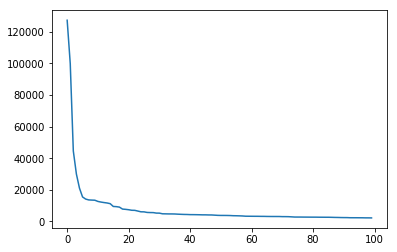

In [217]:
plt.plot(x, frequiences)

In [218]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [219]:
prob_1('我们')

0.0011176050556463474

In [296]:
TOKEN[20:30]

['电影', '不讲道理', '的', '完全', '就是', '吴京', '在', '实现', '他', '这个']

In [221]:
TOKEN = [str(t) for t in TOKEN]

In [222]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [297]:
TOKEN_2_GRAM[20:30]

['电影不讲道理', '不讲道理的', '的完全', '完全就是', '就是吴京', '吴京在', '在实现', '实现他', '他这个', '这个小']

In [224]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [225]:
def prob_1(word): return words_count[word] / len(TOKEN)

In [226]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [227]:
prob_2('去', '吃饭')

5.140782910392555e-07

In [228]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [245]:
get_probablity('俺要吃土豆炖猪肉')

2.513300180303411e-31

In [246]:
get_probablity('洋葱奶昔来一杯')

1.3585880599037004e-19

In [247]:
get_probablity('养乐多绿来一杯')

2.6427648931784153e-13

# 3. 获得最优质的的语言

In [294]:
def generate_best(gen =generate_n1 ,g_model=get_probablity):
    li = [(i,g_model(i) )for i in gen()]
    li2 = sorted(li, key=lambda x: x[1],reverse = True)
    return li2 ,'Best:',li2[0]       

In [295]:
generate_best(generate_n1,get_probablity)

([('我要吃土豆炖小龙虾', 6.98420628061632e-26),
  ('我要吃土豆炖猪肉', 6.98420628061632e-26),
  ('我想吃白菜炖猪肉', 2.3265978811951575e-28),
  ('我们要吃茄子炒小龙虾', 9.29921066712262e-30),
  ('俺想吃土豆炒小龙虾', 5.744686126407797e-31),
  ('俺要吃土豆炖猪肉', 2.513300180303411e-31),
  ('俺要吃土豆炖猪肉', 2.513300180303411e-31),
  ('俺要吃粉条烧牛肉', 2.513300180303411e-31),
  ('俺要吃番茄炖鸡蛋', 2.513300180303411e-31),
  ('俺要吃白菜烧牛肉', 2.513300180303411e-31)],
 'Best:',
 ('我要吃土豆炖小龙虾', 6.98420628061632e-26))